In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from imblearn.under_sampling import NearMiss
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from numpy import set_printoptions
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn import svm
from sklearn import tree
from sklearn.feature_selection import SelectPercentile, f_classif
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn import metrics
import lime.lime_tabular as lm#the type of LIIME analysis we’ll do
import shap #SHAP package
from sklearn.inspection import permutation_importance
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/datasetinfluenzaunbalanced/df_ant_unb.csv
/kaggle/input/datasetinfluenzaunbalanced/df_pcr_unb.csv
/kaggle/input/datasetinfluenzaunbalanced/df_both_unb.csv


In [2]:
def load_data(data):
    data = data.replace(0,'n').replace(1,'p').replace('n',1).replace('p',0)
    data=data.astype(int)
    del data[data.columns[0]]
    return data


#unbalanced
data_rapid = load_data(pd.read_csv("../input/datasetinfluenzaunbalanced/df_ant_unb.csv"))
data_pcr = load_data(pd.read_csv("../input/datasetinfluenzaunbalanced/df_pcr_unb.csv"))
data_both = load_data(pd.read_csv("../input/datasetinfluenzaunbalanced/df_both_unb.csv"))
x_col=data_rapid.iloc[:,:13].columns



In [3]:
def RandomForest_classif(x_train,y_train,param):
    #Classification
    
    
    clf= RandomForestClassifier(**param)
    clf=clf.fit(x_train, y_train)
    
    return clf

def Kneighbors_classif(x_train,y_train,param):
    #Classification
    

    clf= KNeighborsClassifier(**param)
    clf= clf.fit(x_train, y_train)
    
    return clf

def DecisionTree_classif(x_train,y_train,param):
    #Classification
    
    clf = tree.DecisionTreeClassifier(**param)
    clf = clf.fit(x_train,y_train)
    
    return clf

def mpl_classif(x_train,y_train,param):
    
    clf =  MLPClassifier(**param)
    clf=clf.fit(x_train,y_train)
    
    return clf

def gb_classif(x_train,y_train,param):
    
    clf=GradientBoostingClassifier(**param)
    clf=clf.fit(x_train, y_train)
    
    return clf

def xgb_classif(x_train,y_train,param):
    clf = xgb.XGBClassifier(**param)
    
    return clf.fit(x_train, y_train)

def svc_classif(x_train,y_train,param):
    
    regr = svm.SVC(**param)
    regr=regr.fit(x_train, y_train)

    return regr

def lg_with_regu_classif(x_train,y_train,param):
    
    clf = LogisticRegression(** param)
    clf=clf.fit(x_train,y_train)
    
    return clf
def lg_without_regu_classif(x_train,y_train,param):
    
    clf = LogisticRegression(** param)
    clf=clf.fit(x_train,y_train)
    
    return clf




In [4]:
def calculate_feature_importance(model) :
    feat_importances = pd.Series(model.feature_importances_, index=x_col)
    # determine top most important features
    return feat_importances.nlargest(len(x_col))

def calculate_feature_importance2(model) :
    feat_importances = pd.Series(model.best_estimator_.feature_importances_, index=x_col)
    # determine top most important features
    return feat_importances.nlargest(len(x_col))


In [5]:
def feature_importance(X_train, X_val, y_train, y_val,model,label):
    
    r = permutation_importance(model, X_val, y_val,n_repeats=50,random_state=0)
    for i in r.importances_mean.argsort()[::-1]:
       
            print(f"{X_train.columns[i]:<8}" f"{r.importances_mean[i]:.3f}"
                  f" +/- {r.importances_std[i]:.3f}")
    sorted_idx = r.importances_mean.argsort()

    fig, ax = plt.subplots()
    ax.boxplot(r.importances[sorted_idx].T,
               vert=False, labels=X_train.columns[sorted_idx])
    ax.set_title("Permutation Importances:"+label)
    fig.tight_layout()
    plt.show()
    


In [6]:
def plot_feature_importance(importance,color_importace,classif_name): 
    indices =importance.values
    features = importance.index
    plt.title(classif_name+'\nTop Feature Importances')
    plt.barh(range(len(indices)), indices, color=color_importace, align='center')
    plt.yticks(range(len(indices)), features)
    plt.xlabel('Relative Importance')
    plt.show()

# rapid_test_balanced

In [7]:
x_rapid_balan=data_rapid.iloc[:,:13]
y_rapid_balan=data_rapid['Class']


In [8]:
lista_param=[
             {},
             {},
             {'kernel': 'rbf', 'C': 6,'probability':True},
             {'weights': 'distance', 'n_neighbors': 15,'n_jobs': None, 'leaf_size': 5, 'algorithm': 'ball_tree'},
             {'n_estimators':500,'max_depth':5},
             {'solver': 'liblinear', 'penalty': 'l2','C': 0.1},
             {'solver': 'liblinear', 'penalty': 'l2','C': 1.0},
             {'solver': 'adam', 'random_state': 1, 'max_iter': 1200, 'learning_rate': 'adaptive','alpha': 0.0001, 'activation': 'relu'},
             {'n_estimators':300,'max_depth':9,'min_child_weight': 2}]

FEBRE   0.178 +/- 0.014
SATURACAO0.096 +/- 0.010
DESC_RESP0.084 +/- 0.011
CS_SEXO 0.078 +/- 0.011
DISPNEIA0.076 +/- 0.010
TOSSE   0.071 +/- 0.008
GARGANTA0.050 +/- 0.005
FADIGA  0.045 +/- 0.009
DIARREIA0.013 +/- 0.006
DOR_ABD 0.010 +/- 0.004
PERD_PALA0.006 +/- 0.003
VOMITO  0.005 +/- 0.005
PERD_OLFT0.004 +/- 0.002


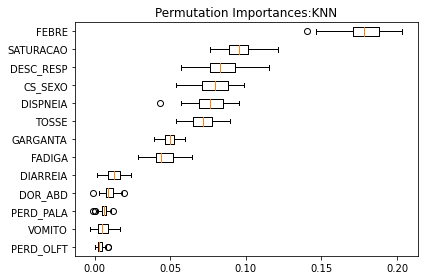

In [9]:
X_train, X_val, y_train, y_val  = train_test_split(x_rapid_balan,y_rapid_balan, 
                                  test_size=0.5,random_state=0,stratify=y_rapid_balan)
model=Kneighbors_classif(X_train,y_train,lista_param[3])
feature_importance(X_train, X_val, y_train, y_val,model,'KNN')


FEBRE   0.160 +/- 0.013
TOSSE   0.069 +/- 0.007
GARGANTA0.061 +/- 0.006
CS_SEXO 0.056 +/- 0.007
DISPNEIA0.053 +/- 0.009
DESC_RESP0.052 +/- 0.009
SATURACAO0.046 +/- 0.007
FADIGA  0.030 +/- 0.008
DIARREIA0.026 +/- 0.007
VOMITO  0.012 +/- 0.007
DOR_ABD 0.009 +/- 0.004
PERD_PALA0.001 +/- 0.004
PERD_OLFT-0.001 +/- 0.002


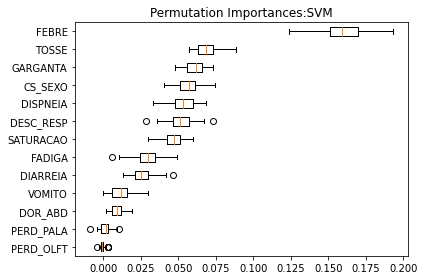

In [10]:
model= svc_classif(X_train,y_train,lista_param[2])
feature_importance(X_train, X_val, y_train, y_val,model,'SVM')



FEBRE   0.175 +/- 0.014
SATURACAO0.091 +/- 0.009
DESC_RESP0.086 +/- 0.012
DISPNEIA0.081 +/- 0.009
CS_SEXO 0.080 +/- 0.009
TOSSE   0.067 +/- 0.008
GARGANTA0.056 +/- 0.007
FADIGA  0.048 +/- 0.009
DIARREIA0.024 +/- 0.006
DOR_ABD 0.005 +/- 0.003
VOMITO  0.005 +/- 0.005
PERD_PALA0.005 +/- 0.002
PERD_OLFT0.004 +/- 0.002


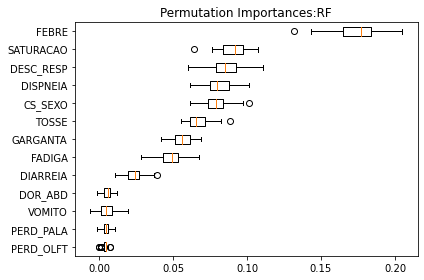

In [11]:
model=RandomForest_classif(X_train,y_train,lista_param[1])
feature_importance(X_train, X_val, y_train, y_val,model,'RF')

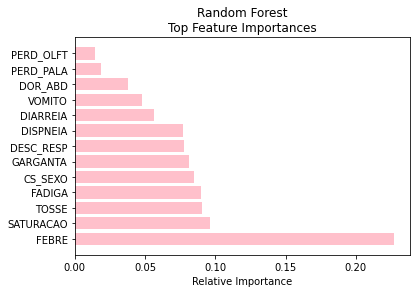

In [12]:
model_rf= RandomForest_classif(x_rapid_balan,y_rapid_balan,lista_param[1])
importance_rf=calculate_feature_importance(model_rf)
plot_feature_importance(importance_rf,'pink','Random Forest')


In [13]:
importance_rf

FEBRE        0.226888
SATURACAO    0.095925
TOSSE        0.090802
FADIGA       0.089739
CS_SEXO      0.084863
GARGANTA     0.080990
DESC_RESP    0.077590
DISPNEIA     0.077367
DIARREIA     0.056541
VOMITO       0.048179
DOR_ABD      0.037957
PERD_PALA    0.018471
PERD_OLFT    0.014690
dtype: float64

FEBRE   0.178 +/- 0.014
SATURACAO0.121 +/- 0.010
DESC_RESP0.087 +/- 0.012
DISPNEIA0.087 +/- 0.009
CS_SEXO 0.082 +/- 0.008
GARGANTA0.077 +/- 0.008
TOSSE   0.069 +/- 0.008
FADIGA  0.060 +/- 0.009
DIARREIA0.031 +/- 0.006
VOMITO  0.023 +/- 0.007
DOR_ABD 0.013 +/- 0.004
PERD_OLFT0.008 +/- 0.003
PERD_PALA0.004 +/- 0.003


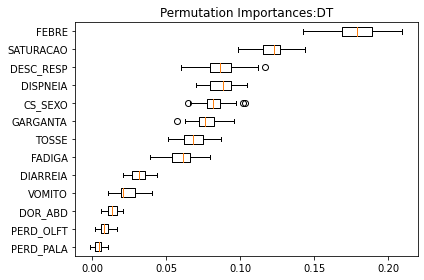

In [14]:
model=DecisionTree_classif(X_train,y_train,lista_param[0])
feature_importance(X_train, X_val, y_train, y_val,model,'DT')

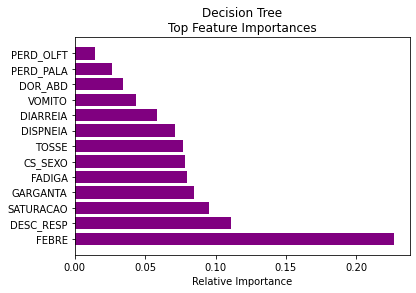

In [15]:
model_dt= DecisionTree_classif(x_rapid_balan,y_rapid_balan,lista_param[0])
importance_dt=calculate_feature_importance(model_dt)
plot_feature_importance(importance_dt,'purple','Decision Tree')

In [16]:
importance_dt

FEBRE        0.226419
DESC_RESP    0.111164
SATURACAO    0.095133
GARGANTA     0.084850
FADIGA       0.079762
CS_SEXO      0.078412
TOSSE        0.076761
DISPNEIA     0.070940
DIARREIA     0.058315
VOMITO       0.043235
DOR_ABD      0.034238
PERD_PALA    0.026648
PERD_OLFT    0.014123
dtype: float64

FEBRE   0.177 +/- 0.013
SATURACAO0.102 +/- 0.011
DESC_RESP0.086 +/- 0.012
CS_SEXO 0.082 +/- 0.008
DISPNEIA0.081 +/- 0.009
TOSSE   0.068 +/- 0.008
GARGANTA0.065 +/- 0.007
FADIGA  0.047 +/- 0.010
DIARREIA0.034 +/- 0.006
VOMITO  0.019 +/- 0.007
DOR_ABD 0.012 +/- 0.004
PERD_OLFT0.005 +/- 0.003
PERD_PALA0.005 +/- 0.003


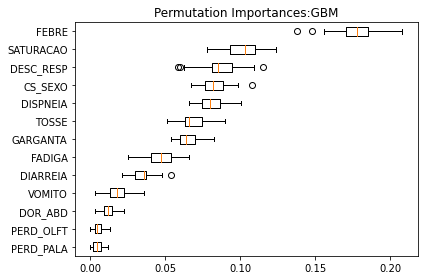

In [17]:
model=gb_classif(X_train,y_train,lista_param[4])
feature_importance(X_train, X_val, y_train, y_val,model,'GBM')

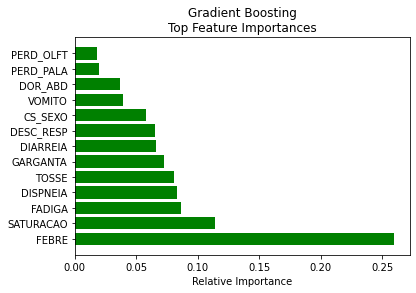

In [18]:
model_gb=gb_classif(x_rapid_balan,y_rapid_balan,lista_param[4])
importance_gb=calculate_feature_importance(model_gb)
plot_feature_importance(importance_gb,'green','Gradient Boosting')


In [19]:
importance_gb

FEBRE        0.259281
SATURACAO    0.113845
FADIGA       0.086588
DISPNEIA     0.083236
TOSSE        0.080466
GARGANTA     0.072901
DIARREIA     0.065957
DESC_RESP    0.065602
CS_SEXO      0.057985
VOMITO       0.039214
DOR_ABD      0.036512
PERD_PALA    0.020134
PERD_OLFT    0.018280
dtype: float64

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[19:15:45] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
FEBRE   0.171 +/- 0.013
SATURACAO0.105 +/- 0.010
DESC_RESP0.082 +/- 0.012
DISPNEIA0.082 +/- 0.009
CS_SEXO 0.075 +/- 0.008
TOSSE   0.071 +/- 0.007
GARGANTA0.070 +/- 0.007
FADIGA  0.052 +/- 0.009
DIARREIA0.026 +/- 0.007
VOMITO  0.012 +/- 0.006
DOR_ABD 0.005 +/- 0.004
PERD_PALA-0.000 +/- 0.002
PERD_OLFT-0.001 +/- 0.002


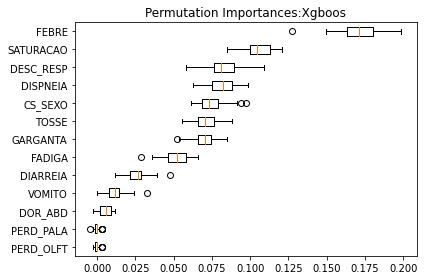

In [20]:
model=xgb_classif(X_train,y_train,lista_param[8])
feature_importance(X_train, X_val, y_train, y_val,model,'Xgboos')

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[19:15:53] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


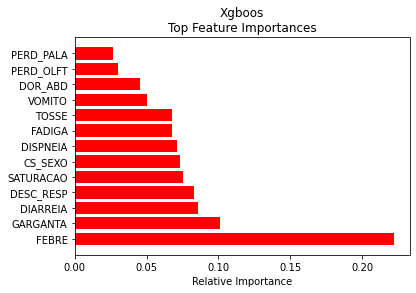

In [21]:
model_xgb=xgb_classif(x_rapid_balan,y_rapid_balan,lista_param[8])
importance_xgb=calculate_feature_importance(model_xgb)
plot_feature_importance(importance_xgb,'red','Xgboos')


In [22]:
importance_xgb

FEBRE        0.221851
GARGANTA     0.100800
DIARREIA     0.085634
DESC_RESP    0.083206
SATURACAO    0.075420
CS_SEXO      0.073239
DISPNEIA     0.071080
FADIGA       0.067967
TOSSE        0.067738
VOMITO       0.050478
DOR_ABD      0.045592
PERD_OLFT    0.030156
PERD_PALA    0.026839
dtype: float32

FEBRE   0.165 +/- 0.012
SATURACAO0.094 +/- 0.009
DESC_RESP0.087 +/- 0.012
CS_SEXO 0.078 +/- 0.009
GARGANTA0.069 +/- 0.008
DISPNEIA0.068 +/- 0.008
TOSSE   0.066 +/- 0.008
FADIGA  0.045 +/- 0.009
DIARREIA0.031 +/- 0.006
VOMITO  0.013 +/- 0.007
DOR_ABD 0.009 +/- 0.005
PERD_PALA0.004 +/- 0.004
PERD_OLFT0.001 +/- 0.003


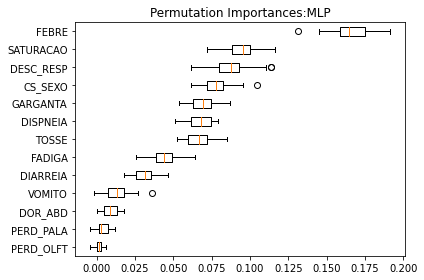

In [23]:
model=mpl_classif(X_train,y_train,lista_param[7])
feature_importance(X_train, X_val, y_train, y_val,model,'MLP')


FEBRE   0.171 +/- 0.015
TOSSE   0.054 +/- 0.007
DIARREIA0.021 +/- 0.007
DISPNEIA0.017 +/- 0.009
SATURACAO0.008 +/- 0.006
VOMITO  0.005 +/- 0.003
GARGANTA0.005 +/- 0.005
DESC_RESP0.003 +/- 0.003
PERD_OLFT0.002 +/- 0.001
PERD_PALA0.001 +/- 0.001
DOR_ABD -0.001 +/- 0.002
FADIGA  -0.005 +/- 0.002
CS_SEXO -0.006 +/- 0.005


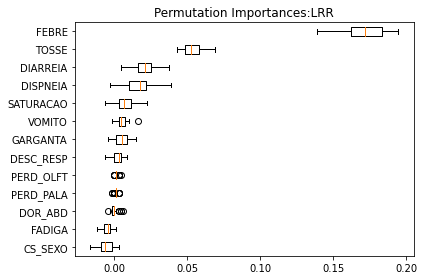

In [24]:
model=lg_with_regu_classif(X_train,y_train,lista_param[5])
feature_importance(X_train, X_val, y_train, y_val,model,'LRR')



FEBRE   0.171 +/- 0.015
TOSSE   0.052 +/- 0.007
DIARREIA0.025 +/- 0.008
DISPNEIA0.017 +/- 0.009
SATURACAO0.010 +/- 0.006
DESC_RESP0.007 +/- 0.004
VOMITO  0.007 +/- 0.003
GARGANTA0.005 +/- 0.005
PERD_OLFT0.003 +/- 0.002
DOR_ABD 0.001 +/- 0.002
PERD_PALA0.000 +/- 0.000
FADIGA  -0.003 +/- 0.002
CS_SEXO -0.003 +/- 0.005


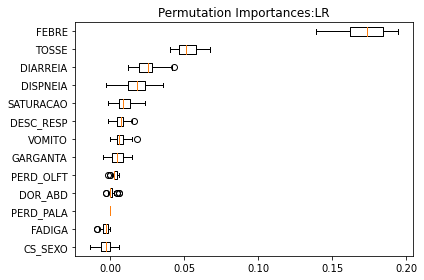

In [25]:
model=lg_without_regu_classif(X_train,y_train,lista_param[6])
feature_importance(X_train, X_val, y_train, y_val,model,'LR')

# pcr_test_balanced

In [26]:
lista_param=[
{},
{},
{'kernel': 'rbf', 'C': 7,'probability':True},
{'weights': 'distance', 'n_neighbors': 5, 'n_jobs': None, 'leaf_size': 3, 'algorithm': 'kd_tree'},
{'n_estimators':500,'max_depth':5},
{'solver': 'liblinear', 'penalty': 'l2','C': 0.1},
{'solver': 'liblinear', 'penalty': 'l2','C': 1.0},
{'max_iter': 1800,'solver':'lbfgs', 'alpha':1e-5, 'random_state':42},
{'n_estimators':300,'max_depth':9,'min_child_weight': 2}]

In [27]:
x_pcr=data_pcr.iloc[:,:13]
y_pcr=data_pcr['Class']
X_train, X_val, y_train, y_val  = train_test_split(x_pcr,y_pcr,test_size=0.5,random_state=0,stratify=y_pcr)

FEBRE   0.218 +/- 0.010
TOSSE   0.096 +/- 0.007
SATURACAO0.092 +/- 0.006
DISPNEIA0.092 +/- 0.005
DESC_RESP0.088 +/- 0.006
CS_SEXO 0.067 +/- 0.006
GARGANTA0.048 +/- 0.005
DIARREIA0.040 +/- 0.004
FADIGA  0.037 +/- 0.005
VOMITO  0.028 +/- 0.004
DOR_ABD 0.009 +/- 0.003
PERD_OLFT0.001 +/- 0.002
PERD_PALA-0.000 +/- 0.001


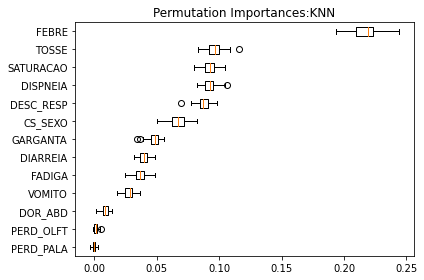

In [28]:
model=Kneighbors_classif(X_train,y_train,lista_param[3])
feature_importance(X_train, X_val, y_train, y_val,model,'KNN')


FEBRE   0.196 +/- 0.008
TOSSE   0.090 +/- 0.007
DISPNEIA0.089 +/- 0.006
SATURACAO0.083 +/- 0.006
DESC_RESP0.069 +/- 0.005
CS_SEXO 0.045 +/- 0.005
GARGANTA0.040 +/- 0.004
DIARREIA0.029 +/- 0.004
VOMITO  0.022 +/- 0.004
DOR_ABD 0.007 +/- 0.003
FADIGA  0.007 +/- 0.003
PERD_PALA0.005 +/- 0.002
PERD_OLFT0.005 +/- 0.002


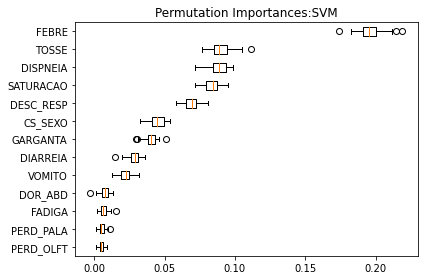

In [29]:
model= svc_classif(X_train,y_train,lista_param[2])
feature_importance(X_train, X_val, y_train, y_val,model,'SVM')

FEBRE   0.201 +/- 0.009
TOSSE   0.100 +/- 0.007
DISPNEIA0.089 +/- 0.006
SATURACAO0.086 +/- 0.007
DESC_RESP0.078 +/- 0.005
CS_SEXO 0.049 +/- 0.006
GARGANTA0.047 +/- 0.005
DIARREIA0.035 +/- 0.005
FADIGA  0.029 +/- 0.005
VOMITO  0.024 +/- 0.003
DOR_ABD 0.012 +/- 0.004
PERD_OLFT0.004 +/- 0.001
PERD_PALA0.002 +/- 0.001


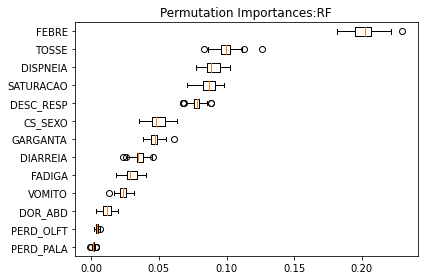

In [30]:
model=RandomForest_classif(X_train,y_train,lista_param[1])
feature_importance(X_train, X_val, y_train, y_val,model,'RF')

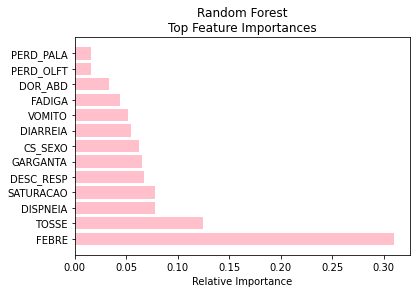

In [31]:
model_rf= RandomForest_classif(x_pcr,y_pcr,lista_param[1])
importance_rf=calculate_feature_importance(model_rf)
plot_feature_importance(importance_rf,'pink','Random Forest')


In [32]:
importance_rf

FEBRE        0.309479
TOSSE        0.124290
DISPNEIA     0.078027
SATURACAO    0.077596
DESC_RESP    0.067045
GARGANTA     0.065484
CS_SEXO      0.062804
DIARREIA     0.054422
VOMITO       0.051592
FADIGA       0.044166
DOR_ABD      0.033044
PERD_OLFT    0.016094
PERD_PALA    0.015955
dtype: float64

FEBRE   0.199 +/- 0.009
TOSSE   0.102 +/- 0.007
DISPNEIA0.092 +/- 0.006
DESC_RESP0.090 +/- 0.005
SATURACAO0.090 +/- 0.007
CS_SEXO 0.051 +/- 0.006
GARGANTA0.048 +/- 0.005
DIARREIA0.043 +/- 0.005
FADIGA  0.034 +/- 0.004
VOMITO  0.029 +/- 0.005
DOR_ABD 0.013 +/- 0.004
PERD_OLFT0.007 +/- 0.002
PERD_PALA-0.003 +/- 0.001


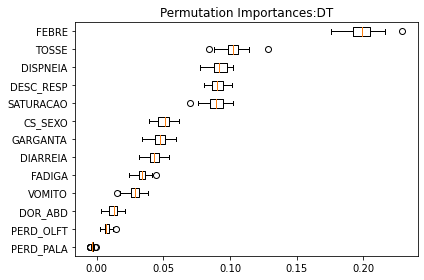

In [33]:
model=DecisionTree_classif(X_train,y_train,lista_param[0])
feature_importance(X_train, X_val, y_train, y_val,model,'DT')

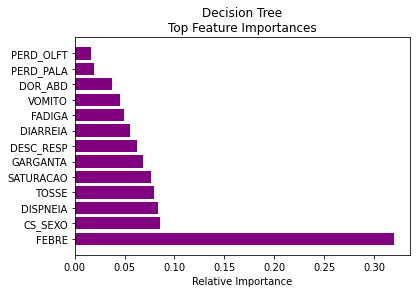

In [34]:
model_dt= DecisionTree_classif(x_pcr,y_pcr,lista_param[0])
importance_dt=calculate_feature_importance(model_dt)
plot_feature_importance(importance_dt,'purple','Decision Tree')

In [35]:
importance_dt

FEBRE        0.319650
CS_SEXO      0.085850
DISPNEIA     0.083891
TOSSE        0.079444
SATURACAO    0.076556
GARGANTA     0.068325
DESC_RESP    0.062406
DIARREIA     0.055484
FADIGA       0.049591
VOMITO       0.045728
DOR_ABD      0.037580
PERD_PALA    0.019244
PERD_OLFT    0.016251
dtype: float64

FEBRE   0.196 +/- 0.008
TOSSE   0.100 +/- 0.007
SATURACAO0.094 +/- 0.007
DISPNEIA0.094 +/- 0.007
DESC_RESP0.085 +/- 0.005
GARGANTA0.051 +/- 0.005
CS_SEXO 0.050 +/- 0.006
DIARREIA0.035 +/- 0.005
FADIGA  0.031 +/- 0.005
VOMITO  0.027 +/- 0.004
DOR_ABD 0.013 +/- 0.004
PERD_OLFT0.008 +/- 0.002
PERD_PALA0.008 +/- 0.002


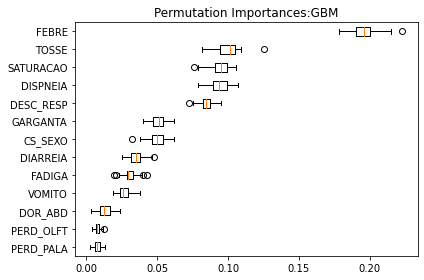

In [36]:
model=gb_classif(X_train,y_train,lista_param[4])
feature_importance(X_train, X_val, y_train, y_val,model,'GBM')

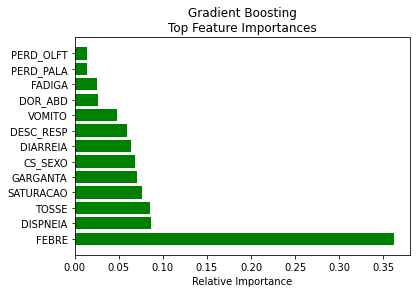

In [37]:
model_gb=gb_classif(x_pcr,y_pcr,lista_param[4])
importance_gb=calculate_feature_importance(model_gb)
plot_feature_importance(importance_gb,'green','Gradient Boosting')


In [38]:
importance_gb

FEBRE        0.361579
DISPNEIA     0.086658
TOSSE        0.085512
SATURACAO    0.075893
GARGANTA     0.071134
CS_SEXO      0.068900
DIARREIA     0.063279
DESC_RESP    0.059171
VOMITO       0.047537
DOR_ABD      0.026953
FADIGA       0.025501
PERD_PALA    0.014273
PERD_OLFT    0.013611
dtype: float64

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[19:18:23] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
FEBRE   0.197 +/- 0.009
TOSSE   0.101 +/- 0.008
DISPNEIA0.096 +/- 0.006
SATURACAO0.091 +/- 0.008
DESC_RESP0.086 +/- 0.005
CS_SEXO 0.055 +/- 0.006
GARGANTA0.048 +/- 0.004
DIARREIA0.037 +/- 0.004
FADIGA  0.030 +/- 0.005
VOMITO  0.023 +/- 0.004
DOR_ABD 0.013 +/- 0.004
PERD_OLFT0.005 +/- 0.002
PERD_PALA0.001 +/- 0.001


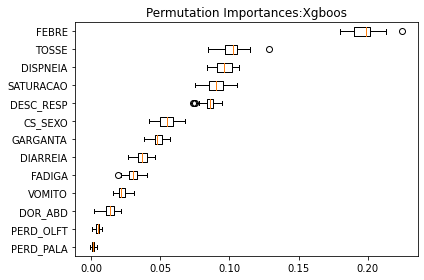

In [39]:
model=xgb_classif(X_train,y_train,lista_param[8])
feature_importance(X_train, X_val, y_train, y_val,model,'Xgboos')

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[19:18:33] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


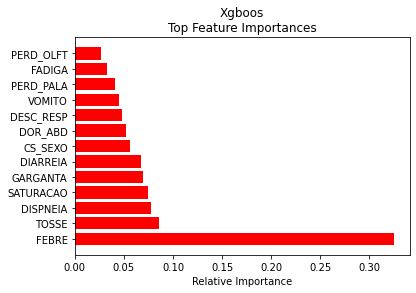

In [40]:
model_xgb=xgb_classif(x_pcr,y_pcr,lista_param[8])
importance_xgb=calculate_feature_importance(model_xgb)
plot_feature_importance(importance_xgb,'red','Xgboos')

In [41]:
importance_xgb

FEBRE        0.324490
TOSSE        0.085785
DISPNEIA     0.077244
SATURACAO    0.074311
GARGANTA     0.069495
DIARREIA     0.067075
CS_SEXO      0.056553
DOR_ABD      0.051848
DESC_RESP    0.048103
VOMITO       0.044937
PERD_PALA    0.040904
FADIGA       0.032610
PERD_OLFT    0.026643
dtype: float32

FEBRE   0.204 +/- 0.009
SATURACAO0.102 +/- 0.007
TOSSE   0.100 +/- 0.008
DESC_RESP0.091 +/- 0.005
DISPNEIA0.088 +/- 0.006
CS_SEXO 0.050 +/- 0.006
GARGANTA0.050 +/- 0.005
DIARREIA0.046 +/- 0.006
VOMITO  0.040 +/- 0.004
FADIGA  0.033 +/- 0.005
DOR_ABD 0.012 +/- 0.004
PERD_PALA0.009 +/- 0.002
PERD_OLFT0.004 +/- 0.002


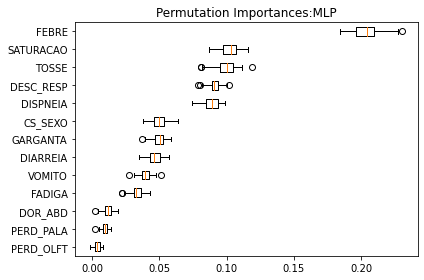

In [42]:
model=mpl_classif(X_train,y_train,lista_param[7])
feature_importance(X_train, X_val, y_train, y_val,model,'MLP')

FEBRE   0.180 +/- 0.009
TOSSE   0.075 +/- 0.007
DISPNEIA0.027 +/- 0.005
SATURACAO0.014 +/- 0.005
DIARREIA0.013 +/- 0.004
DOR_ABD 0.005 +/- 0.003
PERD_PALA0.000 +/- 0.000
PERD_OLFT0.000 +/- 0.000
GARGANTA-0.000 +/- 0.003
FADIGA  -0.001 +/- 0.002
VOMITO  -0.001 +/- 0.002
DESC_RESP-0.005 +/- 0.003
CS_SEXO -0.005 +/- 0.002


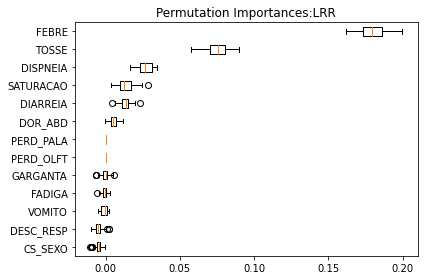

In [43]:
model=lg_with_regu_classif(X_train,y_train,lista_param[5])
feature_importance(X_train, X_val, y_train, y_val,model,'LRR')

FEBRE   0.179 +/- 0.009
TOSSE   0.076 +/- 0.007
DISPNEIA0.028 +/- 0.005
SATURACAO0.015 +/- 0.005
DIARREIA0.014 +/- 0.004
DOR_ABD 0.005 +/- 0.003
PERD_PALA0.000 +/- 0.000
PERD_OLFT-0.000 +/- 0.000
VOMITO  -0.000 +/- 0.002
GARGANTA-0.000 +/- 0.002
FADIGA  -0.001 +/- 0.002
DESC_RESP-0.002 +/- 0.003
CS_SEXO -0.003 +/- 0.002


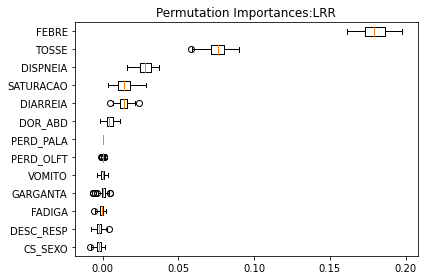

In [44]:
model=lg_without_regu_classif(X_train,y_train,lista_param[6])
feature_importance(X_train, X_val, y_train, y_val,model,'LRR')

# both_test_balanced

In [45]:
lista_param=[{},{},{'kernel': 'rbf', 'C': 9},
             {'weights': 'distance','n_neighbors': 8, 'n_jobs': -1,'leaf_size': 5, 'algorithm': 'brute'},
             {'n_estimators':500,'max_depth':5},
             {'solver': 'liblinear', 'penalty': 'l2','C': 0.1},
             {'solver': 'liblinear', 'penalty': 'l2','C': 1.0},
             {'max_iter': 1200,'solver':'lbfgs', 'alpha':1e-5, 'random_state':42},
            {'n_estimators':300,'max_depth':9,'min_child_weight': 2}]

In [46]:
x_both=data_both.iloc[:,:13]
y_both=data_both['Class']
X_train, X_val, y_train, y_val  = train_test_split(x_both,y_both, 
                                  test_size=0.5,random_state=0,stratify=y_both)

FEBRE   0.148 +/- 0.006
SATURACAO0.118 +/- 0.007
DESC_RESP0.105 +/- 0.006
CS_SEXO 0.100 +/- 0.006
DISPNEIA0.100 +/- 0.005
GARGANTA0.078 +/- 0.004
TOSSE   0.057 +/- 0.004
FADIGA  0.041 +/- 0.005
VOMITO  0.032 +/- 0.003
DOR_ABD 0.017 +/- 0.002
DIARREIA0.015 +/- 0.003
PERD_OLFT0.006 +/- 0.001
PERD_PALA0.002 +/- 0.001


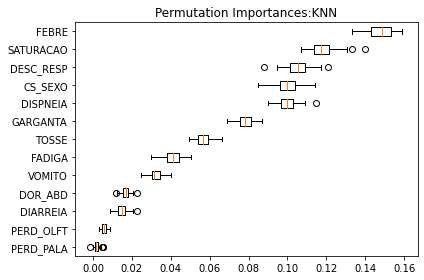

In [47]:
model=Kneighbors_classif(X_train,y_train,lista_param[3])
feature_importance(X_train, X_val, y_train, y_val,model,'KNN')


FEBRE   0.135 +/- 0.006
DISPNEIA0.111 +/- 0.006
SATURACAO0.108 +/- 0.006
DESC_RESP0.090 +/- 0.005
CS_SEXO 0.088 +/- 0.006
GARGANTA0.071 +/- 0.004
TOSSE   0.056 +/- 0.004
FADIGA  0.037 +/- 0.004
VOMITO  0.023 +/- 0.003
DIARREIA0.013 +/- 0.003
DOR_ABD 0.011 +/- 0.002
PERD_OLFT0.007 +/- 0.001
PERD_PALA0.006 +/- 0.002


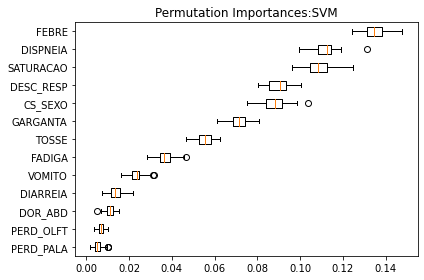

In [48]:
model= svc_classif(X_train,y_train,lista_param[2])
feature_importance(X_train, X_val, y_train, y_val,model,'SVM')

FEBRE   0.145 +/- 0.006
SATURACAO0.120 +/- 0.007
DISPNEIA0.106 +/- 0.004
DESC_RESP0.104 +/- 0.005
CS_SEXO 0.096 +/- 0.006
GARGANTA0.080 +/- 0.005
TOSSE   0.058 +/- 0.004
FADIGA  0.040 +/- 0.004
VOMITO  0.032 +/- 0.004
DOR_ABD 0.018 +/- 0.003
DIARREIA0.018 +/- 0.003
PERD_OLFT0.006 +/- 0.001
PERD_PALA0.001 +/- 0.001


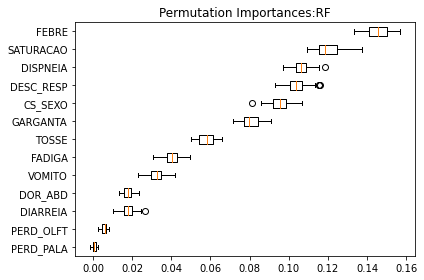

In [49]:
model=RandomForest_classif(X_train,y_train,lista_param[1])
feature_importance(X_train, X_val, y_train, y_val,model,'RF')

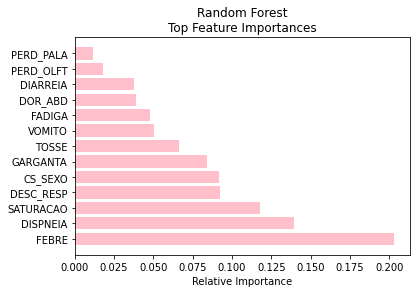

In [50]:
model_rf= RandomForest_classif(x_both,y_both,lista_param[1])
importance_rf=calculate_feature_importance(model_rf)
plot_feature_importance(importance_rf,'pink','Random Forest')

In [51]:
importance_rf

FEBRE        0.202751
DISPNEIA     0.139752
SATURACAO    0.117923
DESC_RESP    0.092272
CS_SEXO      0.091994
GARGANTA     0.084302
TOSSE        0.066473
VOMITO       0.050152
FADIGA       0.048096
DOR_ABD      0.039169
DIARREIA     0.037650
PERD_OLFT    0.017755
PERD_PALA    0.011709
dtype: float64

FEBRE   0.145 +/- 0.006
SATURACAO0.118 +/- 0.005
DISPNEIA0.110 +/- 0.005
DESC_RESP0.095 +/- 0.005
CS_SEXO 0.093 +/- 0.006
GARGANTA0.079 +/- 0.004
TOSSE   0.052 +/- 0.004
FADIGA  0.038 +/- 0.004
VOMITO  0.032 +/- 0.003
DIARREIA0.021 +/- 0.003
DOR_ABD 0.020 +/- 0.003
PERD_OLFT0.011 +/- 0.002
PERD_PALA0.005 +/- 0.002


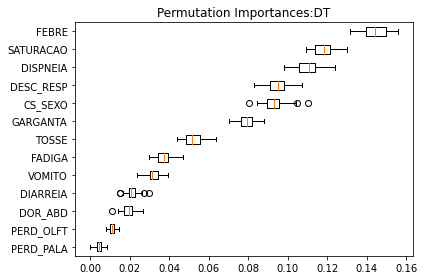

In [52]:
model=DecisionTree_classif(X_train,y_train,lista_param[0])
feature_importance(X_train, X_val, y_train, y_val,model,'DT')

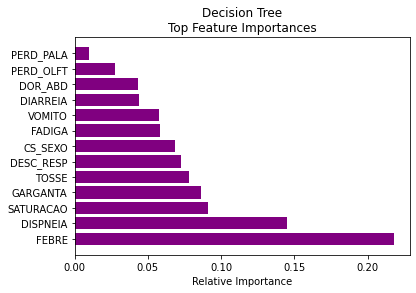

In [53]:
model_dt= DecisionTree_classif(x_both,y_both,lista_param[0])
importance_dt=calculate_feature_importance(model_dt)
plot_feature_importance(importance_dt,'purple','Decision Tree')

In [54]:
importance_dt

FEBRE        0.217770
DISPNEIA     0.144856
SATURACAO    0.090922
GARGANTA     0.086459
TOSSE        0.077768
DESC_RESP    0.072894
CS_SEXO      0.068212
FADIGA       0.058272
VOMITO       0.057695
DIARREIA     0.044181
DOR_ABD      0.043302
PERD_OLFT    0.027670
PERD_PALA    0.009999
dtype: float64

FEBRE   0.143 +/- 0.006
SATURACAO0.112 +/- 0.006
DISPNEIA0.106 +/- 0.005
DESC_RESP0.093 +/- 0.005
CS_SEXO 0.089 +/- 0.006
GARGANTA0.078 +/- 0.005
TOSSE   0.057 +/- 0.004
FADIGA  0.038 +/- 0.005
VOMITO  0.024 +/- 0.003
DOR_ABD 0.013 +/- 0.002
DIARREIA0.012 +/- 0.003
PERD_OLFT0.009 +/- 0.002
PERD_PALA0.005 +/- 0.002


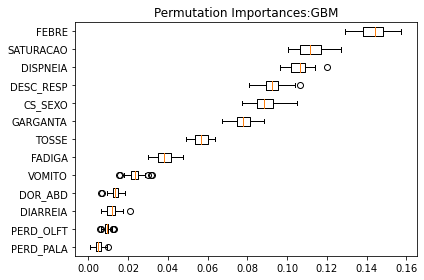

In [55]:
model=gb_classif(X_train,y_train,lista_param[4])
feature_importance(X_train, X_val, y_train, y_val,model,'GBM')

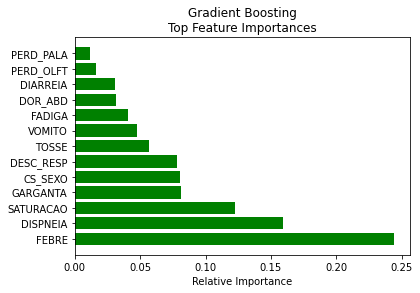

In [56]:
model_gb=gb_classif(x_both,y_both,lista_param[4])
importance_gb=calculate_feature_importance(model_gb)
plot_feature_importance(importance_gb,'green','Gradient Boosting')


In [57]:
importance_gb

FEBRE        0.243739
DISPNEIA     0.159259
SATURACAO    0.122251
GARGANTA     0.080976
CS_SEXO      0.080595
DESC_RESP    0.077965
TOSSE        0.056688
VOMITO       0.047569
FADIGA       0.040932
DOR_ABD      0.031578
DIARREIA     0.031117
PERD_OLFT    0.016010
PERD_PALA    0.011321
dtype: float64

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[19:23:11] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
FEBRE   0.146 +/- 0.007
SATURACAO0.122 +/- 0.006
DISPNEIA0.115 +/- 0.005
DESC_RESP0.098 +/- 0.005
CS_SEXO 0.096 +/- 0.006
GARGANTA0.078 +/- 0.005
TOSSE   0.058 +/- 0.004
FADIGA  0.040 +/- 0.005
VOMITO  0.032 +/- 0.004
DOR_ABD 0.018 +/- 0.002
DIARREIA0.018 +/- 0.003
PERD_OLFT0.007 +/- 0.001
PERD_PALA0.004 +/- 0.001


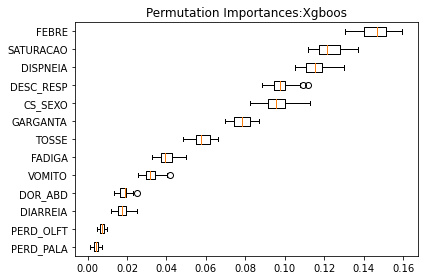

In [58]:
model=xgb_classif(X_train,y_train,lista_param[8])
feature_importance(X_train, X_val, y_train, y_val,model,'Xgboos')

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[19:23:25] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


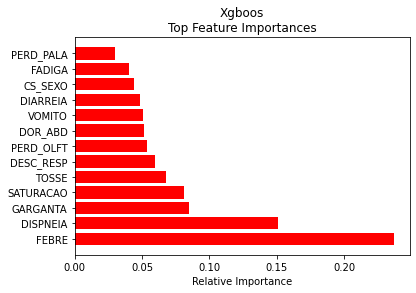

In [59]:
model_xgb=xgb_classif(x_both,y_both,lista_param[8])
importance_xgb=calculate_feature_importance(model_xgb)
plot_feature_importance(importance_xgb,'red','Xgboos')

In [60]:
importance_xgb

FEBRE        0.236583
DISPNEIA     0.151032
GARGANTA     0.085015
SATURACAO    0.081054
TOSSE        0.067928
DESC_RESP    0.059554
PERD_OLFT    0.053906
DOR_ABD      0.051382
VOMITO       0.050813
DIARREIA     0.048162
CS_SEXO      0.044346
FADIGA       0.040388
PERD_PALA    0.029837
dtype: float32

FEBRE   0.150 +/- 0.007
SATURACAO0.119 +/- 0.007
DISPNEIA0.118 +/- 0.004
DESC_RESP0.104 +/- 0.006
CS_SEXO 0.100 +/- 0.006
GARGANTA0.078 +/- 0.005
TOSSE   0.060 +/- 0.004
FADIGA  0.046 +/- 0.004
VOMITO  0.031 +/- 0.003
DOR_ABD 0.021 +/- 0.003
DIARREIA0.020 +/- 0.003
PERD_PALA0.010 +/- 0.002
PERD_OLFT0.009 +/- 0.002


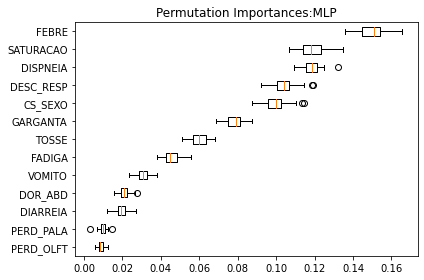

In [61]:
model=mpl_classif(X_train,y_train,lista_param[7])
feature_importance(X_train, X_val, y_train, y_val,model,'MLP')

FEBRE   0.125 +/- 0.007
DISPNEIA0.070 +/- 0.006
CS_SEXO 0.058 +/- 0.005
SATURACAO0.043 +/- 0.004
DESC_RESP0.040 +/- 0.004
TOSSE   0.033 +/- 0.004
GARGANTA0.025 +/- 0.004
VOMITO  0.011 +/- 0.002
DOR_ABD 0.009 +/- 0.002
DIARREIA0.008 +/- 0.003
PERD_PALA0.001 +/- 0.001
FADIGA  0.001 +/- 0.001
PERD_OLFT-0.000 +/- 0.000


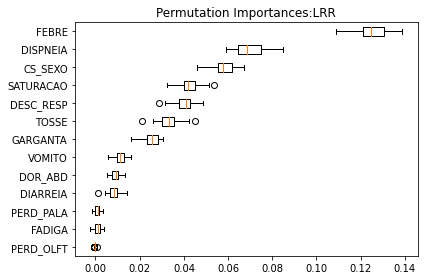

In [62]:
model=lg_with_regu_classif(X_train,y_train,lista_param[5])
feature_importance(X_train, X_val, y_train, y_val,model,'LRR')

FEBRE   0.125 +/- 0.007
DISPNEIA0.071 +/- 0.006
CS_SEXO 0.058 +/- 0.005
SATURACAO0.042 +/- 0.004
DESC_RESP0.040 +/- 0.004
TOSSE   0.034 +/- 0.004
GARGANTA0.026 +/- 0.004
VOMITO  0.012 +/- 0.002
DIARREIA0.010 +/- 0.003
DOR_ABD 0.009 +/- 0.002
PERD_PALA0.002 +/- 0.001
FADIGA  0.001 +/- 0.002
PERD_OLFT-0.000 +/- 0.000


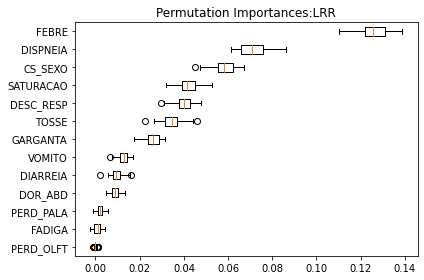

In [63]:
model=lg_without_regu_classif(X_train,y_train,lista_param[6])
feature_importance(X_train, X_val, y_train, y_val,model,'LRR')